In [61]:
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv("datafiles/Advertising.csv")


df.drop(columns=["Unnamed: 0"], inplace=True)


# print(df.head())
# print(df.isnull().sum())
print(df.shape)
print(df.describe())

(200, 18)
               TV       radio   newspaper       sales  Unnamed: 5          x  \
count  200.000000  200.000000  200.000000  200.000000         0.0   6.000000   
mean   147.042500   23.264000   30.554000   14.022500         NaN  62.583333   
std     85.854236   14.846809   21.778621    5.217457         NaN  10.797299   
min      0.700000    0.000000    0.300000    1.600000         NaN  45.100000   
25%     74.375000    9.975000   12.750000   10.375000         NaN  58.425000   
50%    149.750000   22.900000   25.750000   12.900000         NaN  63.850000   
75%    218.825000   36.525000   45.100000   17.400000         NaN  69.275000   
max    296.400000   49.600000  114.000000   27.000000         NaN  75.000000   

               y  Unnamed: 8     x mean  y mean  Unnamed: 11   Unnamed: 12  \
count   6.000000         0.0   1.000000     1.0          0.0     13.000000   
mean   13.400000         NaN  62.583333    13.4          NaN   2999.161325   
std     5.765414         NaN       

<Axes: ylabel='TV'>

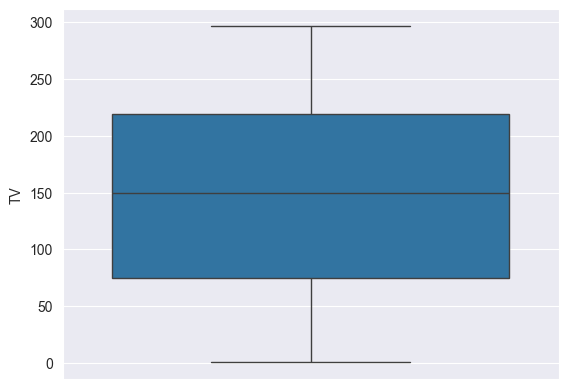

In [62]:
# %pip install seaborn
import seaborn as sns
sns.boxplot(df["TV"])
# sns.boxplot(df["newspaper"])
# sns.boxplot(df["Sales"])


<Axes: ylabel='radio'>

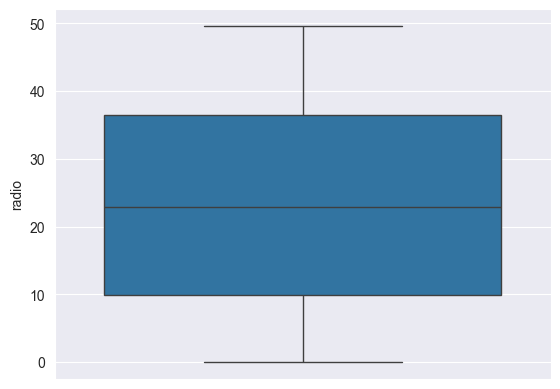

In [63]:
sns.boxplot(df["radio"])


<Axes: ylabel='newspaper'>

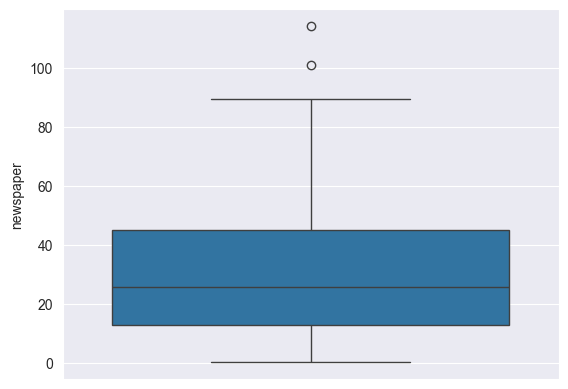

In [64]:
sns.boxplot(df["newspaper"])


In [65]:
df["TV"].head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [66]:
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


In [70]:
y_pred = model.predict(X_test)

In [71]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 3.1740973539761033
R2: 0.899438024100912


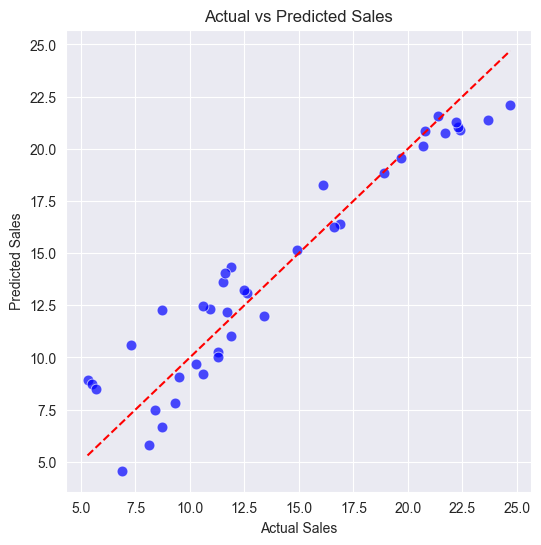

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted sales
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=60, alpha=0.7)

# Add perfect prediction line
sns.lineplot(x=[y_test.min(), y_test.max()],
             y=[y_test.min(), y_test.max()],
             color="red", linestyle="--")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [73]:
from sklearn.preprocessing import PolynomialFeatures
X1 = [[2,3]]
print(type(X1))
print(X1)

<class 'list'>
[[2, 3]]


In [74]:
po1 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = po1.fit_transform(X1)


In [75]:
X_poly

array([[2., 3., 4., 6., 9.]])

In [76]:
pol = PolynomialFeatures(2,include_bias=False)

In [77]:
x_poly = pol.fit_transform(X)

In [78]:
x_poly

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 4.939014879989239
Coefficients: [ 5.32356160e-02  1.70980451e-02  1.05807447e-02 -1.12286779e-04
  1.11121741e-03 -7.37989541e-05  1.32842962e-04  1.24892479e-04
  2.79665560e-05]


In [82]:
y_pred = model.predict(X_test)

In [83]:
ytrainp = model.predict(X_train)
ytestp = model.predict(X_test)

In [84]:
print(abs(y_train-ytrainp).mean())
print(abs(y_test - ytestp).mean())

0.4089721951355271
0.5261794444043822


In [85]:
# # Scatter plot of Actual vs Predicted sales
# plt.figure(figsize=(6,6))
# sns.scatterplot(x=y_test, y=y_pred, color="blue", s=60, alpha=0.7)
#
# # Add perfect prediction line
# sns.lineplot(x=[y_test.min(), y_test.max()],
#              y=[y_test.min(), y_test.max()],
#              color="red", linestyle="--")
#
# plt.xlabel("Actual Sales")
# plt.ylabel("Predicted Sales")
# plt.title("Actual vs Predicted Sales")
# plt.show()

In [86]:
import  matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

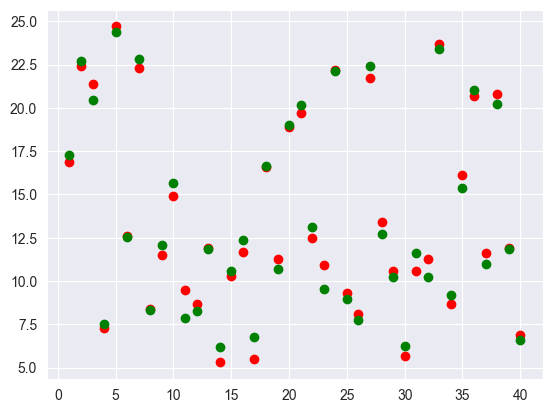

In [87]:
plt.scatter(range(1,len(X_test)+1),y_test,c='r')
plt.scatter(range(1,len(X_test)+1),ytestp,c='g')

plt.show

In [88]:
print("R2:", r2_score(y_test, y_pred))

R2: 0.9869181490609604
